In [1]:
# This is a package in preview.
from azureml.opendatasets import NycTlcYellow

from datetime import datetime
from dateutil import parser


end_date = parser.parse('2018-06-06')
start_date = parser.parse('2018-05-01')
nyc_tlc = NycTlcYellow(start_date=start_date, end_date=end_date)
nyc_tlc_df = nyc_tlc.to_pandas_dataframe()

nyc_tlc_df.info()

{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpaz7ah7rv/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2018/puMonth=5/part-00000-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426339-118.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpaz7ah7rv/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2018/puMonth=5/part-00008-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426341-118.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpaz7ah7rv/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2018/puMonth=5/part-00016-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426328-116.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpaz7

{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmprpk8tx3s/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2016/puMonth=1/part-00119-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2689-1.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmprpk8tx3s/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2016/puMonth=2/part-00060-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2630-2.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmprpk8tx3s/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2016/puMonth=3/part-00196-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2766-1.c000.snappy.parquet
{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False',

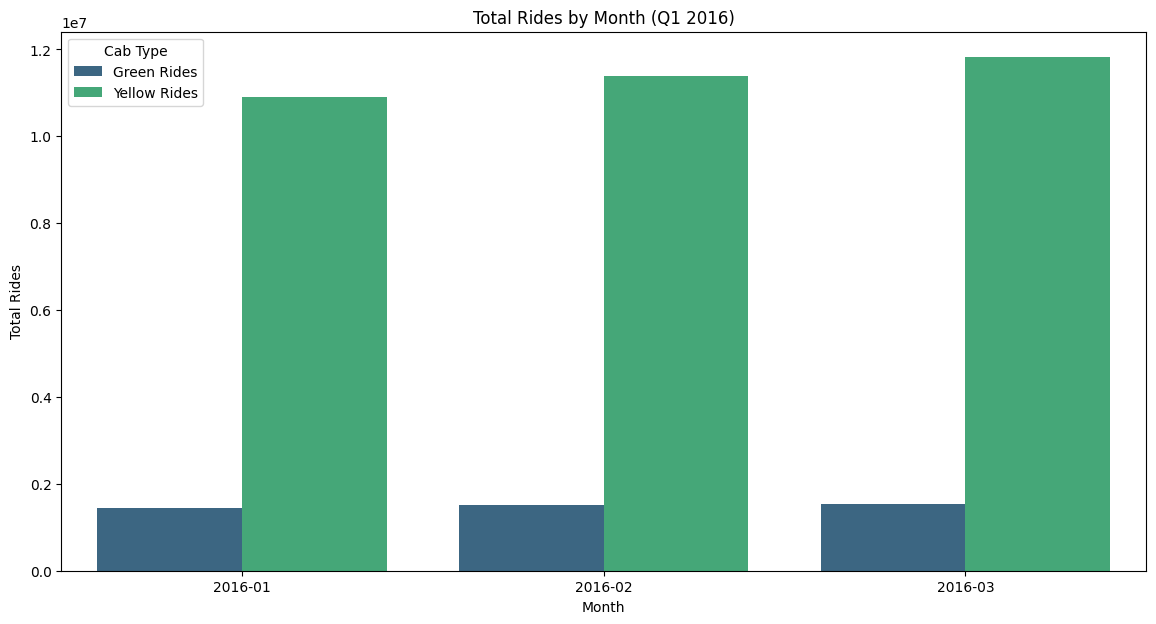

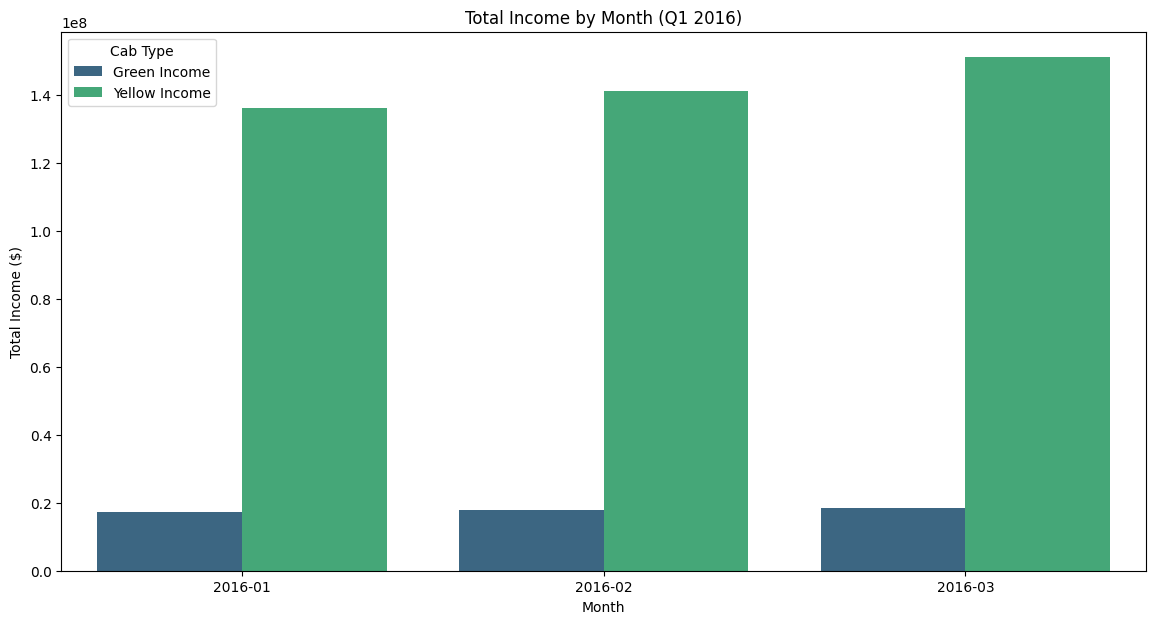

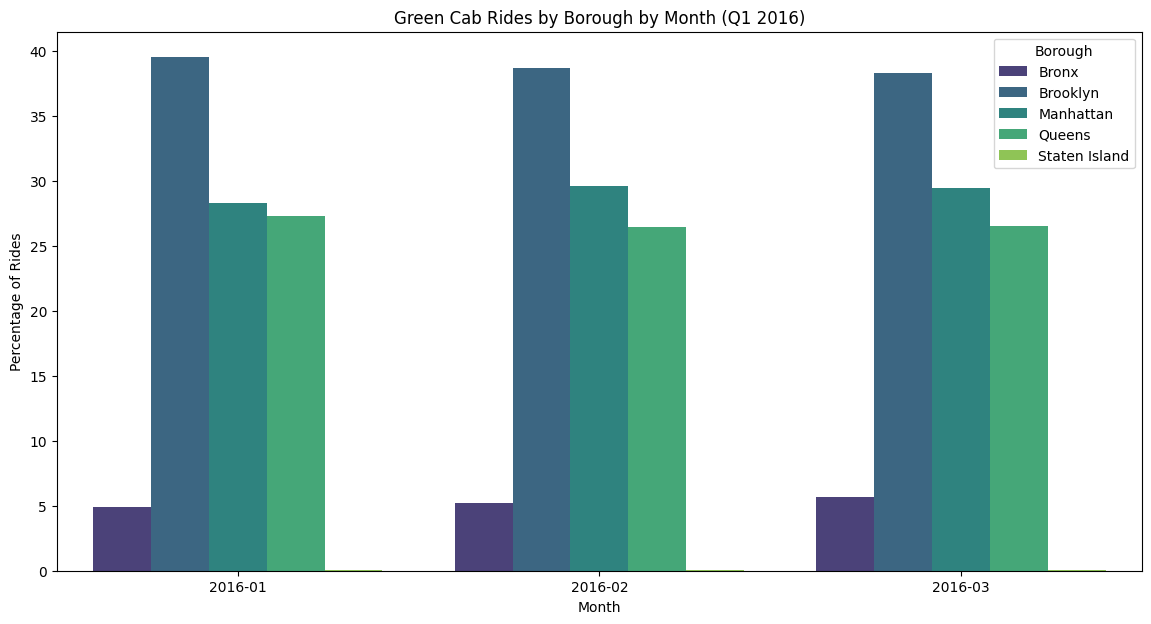

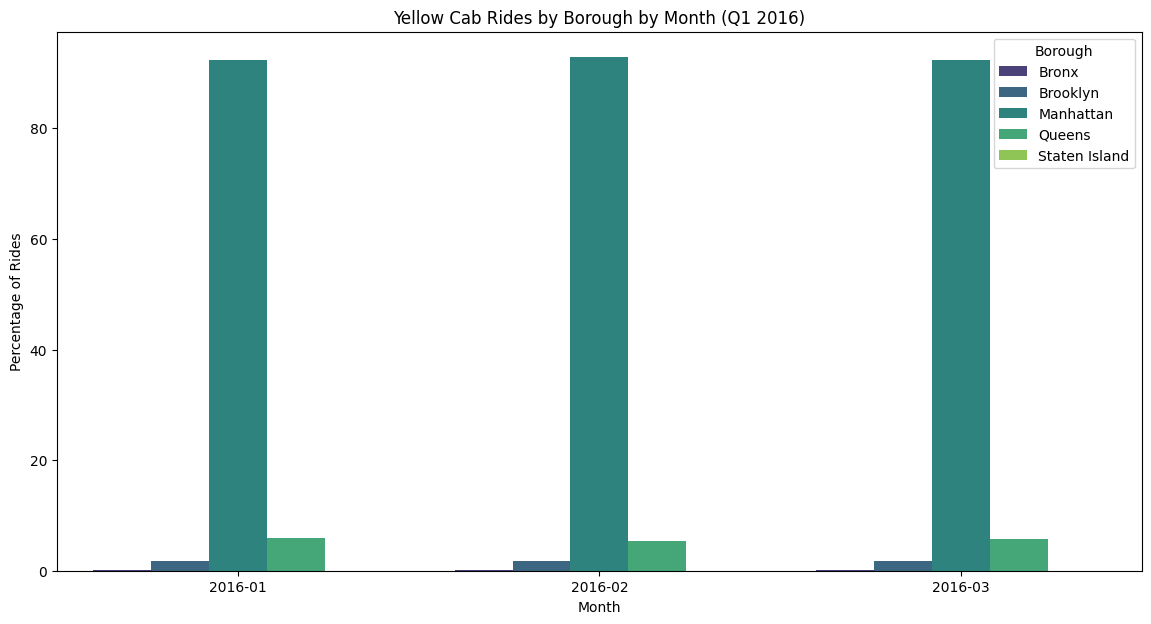

In [6]:
# Import necessary libraries
from azureml.opendatasets import NycTlcGreen, NycTlcYellow
from datetime import datetime
from dateutil import parser
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Set the logging level to ERROR to suppress verbose logging
logging.getLogger('azureml.opendatasets').setLevel(logging.ERROR)

# Set the date range for Q1 2016
start_date = parser.parse('2016-01-01')
end_date = parser.parse('2016-03-31')

# Fetch the green cab dataset
nyc_tlc_green = NycTlcGreen(start_date=start_date, end_date=end_date)
nyc_tlc_green_df = nyc_tlc_green.to_pandas_dataframe()

# Fetch the yellow cab dataset
nyc_tlc_yellow = NycTlcYellow(start_date=start_date, end_date=end_date)
nyc_tlc_yellow_df = nyc_tlc_yellow.to_pandas_dataframe()

# Convert datetime columns to month for aggregation
nyc_tlc_green_df['month'] = nyc_tlc_green_df['lpepPickupDatetime'].dt.to_period('M')
nyc_tlc_yellow_df['month'] = nyc_tlc_yellow_df['tpepPickupDateTime'].dt.to_period('M')

# Calculate total rides and total income by month
green_rides_by_month = nyc_tlc_green_df.groupby('month').size()
yellow_rides_by_month = nyc_tlc_yellow_df.groupby('month').size()

green_income_by_month = nyc_tlc_green_df.groupby('month')['fareAmount'].sum()
yellow_income_by_month = nyc_tlc_yellow_df.groupby('month')['fareAmount'].sum()

# Plot total rides by month
rides_by_month_df = pd.DataFrame({
    'Month': green_rides_by_month.index.astype(str),
    'Green Rides': green_rides_by_month.values,
    'Yellow Rides': yellow_rides_by_month.values
})
rides_by_month_df = pd.melt(rides_by_month_df, id_vars=['Month'], value_vars=['Green Rides', 'Yellow Rides'], var_name='Cab Type', value_name='Total Rides')

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Total Rides', hue='Cab Type', data=rides_by_month_df, palette='viridis')
plt.title('Total Rides by Month (Q1 2016)')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.savefig('total_rides_by_month.png')
plt.show()

# Plot total income by month
income_by_month_df = pd.DataFrame({
    'Month': green_income_by_month.index.astype(str),
    'Green Income': green_income_by_month.values,
    'Yellow Income': yellow_income_by_month.values
})
income_by_month_df = pd.melt(income_by_month_df, id_vars=['Month'], value_vars=['Green Income', 'Yellow Income'], var_name='Cab Type', value_name='Total Income')

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Total Income', hue='Cab Type', data=income_by_month_df, palette='viridis')
plt.title('Total Income by Month (Q1 2016)')
plt.xlabel('Month')
plt.ylabel('Total Income ($)')
plt.savefig('total_income_by_month.png')
plt.show()

# Load the GeoJSON file for NYC boroughs and neighborhoods
boroughs_geojson_url = "https://raw.githubusercontent.com/dwillis/nyc-maps/master/boroughs.geojson"
boroughs = gpd.read_file(boroughs_geojson_url)

# Create GeoDataFrames for pickup locations
pickup_gdf_green = gpd.GeoDataFrame(nyc_tlc_green_df, geometry=gpd.points_from_xy(nyc_tlc_green_df.pickupLongitude, nyc_tlc_green_df.pickupLatitude), crs="EPSG:4326")
pickup_gdf_yellow = gpd.GeoDataFrame(nyc_tlc_yellow_df, geometry=gpd.points_from_xy(nyc_tlc_yellow_df.startLon, nyc_tlc_yellow_df.startLat), crs="EPSG:4326")

# Spatial join to find the boroughs for pickup locations
pickup_gdf_green = gpd.sjoin(pickup_gdf_green, boroughs[['BoroName', 'geometry']], how='left', predicate='within')
pickup_gdf_yellow = gpd.sjoin(pickup_gdf_yellow, boroughs[['BoroName', 'geometry']], how='left', predicate='within')

# Calculate percentage of rides by borough by month
green_rides_by_borough_month = pickup_gdf_green.groupby(['month', 'BoroName']).size().unstack(fill_value=0)
yellow_rides_by_borough_month = pickup_gdf_yellow.groupby(['month', 'BoroName']).size().unstack(fill_value=0)

green_rides_by_borough_month_pct = green_rides_by_borough_month.div(green_rides_by_borough_month.sum(axis=1), axis=0) * 100
yellow_rides_by_borough_month_pct = yellow_rides_by_borough_month.div(yellow_rides_by_borough_month.sum(axis=1), axis=0) * 100

# Plot percentage of rides by borough by month
green_rides_by_borough_month_pct = green_rides_by_borough_month_pct.stack().reset_index(name='Percentage').rename(columns={'month': 'Month', 'BoroName': 'Borough'})
yellow_rides_by_borough_month_pct = yellow_rides_by_borough_month_pct.stack().reset_index(name='Percentage').rename(columns={'month': 'Month', 'BoroName': 'Borough'})

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Percentage', hue='Borough', data=green_rides_by_borough_month_pct, palette='viridis')
plt.title('Green Cab Rides by Borough by Month (Q1 2016)')
plt.xlabel('Month')
plt.ylabel('Percentage of Rides')
plt.savefig('green_rides_by_borough_month.png')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Percentage', hue='Borough', data=yellow_rides_by_borough_month_pct, palette='viridis')
plt.title('Yellow Cab Rides by Borough by Month (Q1 2016)')
plt.xlabel('Month')
plt.ylabel('Percentage of Rides')
plt.savefig('yellow_rides_by_borough_month.png')
plt.show()

# Save results to CSV files
rides_by_month_df.to_csv('rides_by_month.csv', index=False)
income_by_month_df.to_csv('income_by_month.csv', index=False)
green_rides_by_borough_month_pct.to_csv('green_rides_by_borough_month.csv', index=False)
yellow_rides_by_borough_month_pct.to_csv('yellow_rides_by_borough_month.csv', index=False)
